# Task 2 - To Explore Unsupervised Machine Learning

#### From ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author: MANASHA.K

In [1]:
# Import  libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans 
from sklearn import datasets

### READING DATASET

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### EXPLORING DATASET

In [3]:
iris_df.shape

(150, 4)

There are 150 rows and 4 columns.

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- It can be observed that all the features have different means and standard deviations.

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### CHECKING NULL VALUES

In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There are no Null values in dataset.

### STANDARDIZATION

In [7]:
#Standardization of independent variables
ir=iris_df.iloc[:,:]
sc=StandardScaler()
X_std=sc.fit_transform(ir)
X_std=pd.DataFrame(X_std)
X_std.columns=ir.columns
X = X_std.iloc[:, [0, 1, 2, 3]].values

- KMeans clustering involves clustering of the data using the euclidean distance between the data and centroid, so standardization of the features important.

### FINDING NUMBER OF CLUSTERS

How do you find the optimum number of clusters for K Means? How does one determine the value of K?

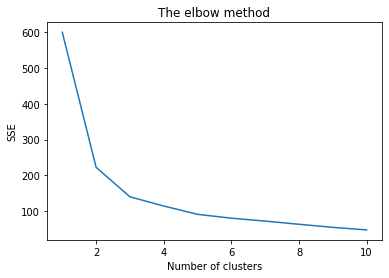

In [8]:
from sklearn.cluster import KMeans
SSE = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Within cluster sum of squares
plt.show()

- From the above graph, we can observed that before the value k=3, the SSE decreases and the curve is almost parallel to x-axis grater than k=3.
- From this we choose the number of clusters as  '3'.

### MODEL BUILDING,TRAINING & PREDICTION

In [9]:
#Model building & training using KMeans Clustering Algorithm
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### VISUALIZING CLUSTERS

<function matplotlib.pyplot.show(*args, **kw)>

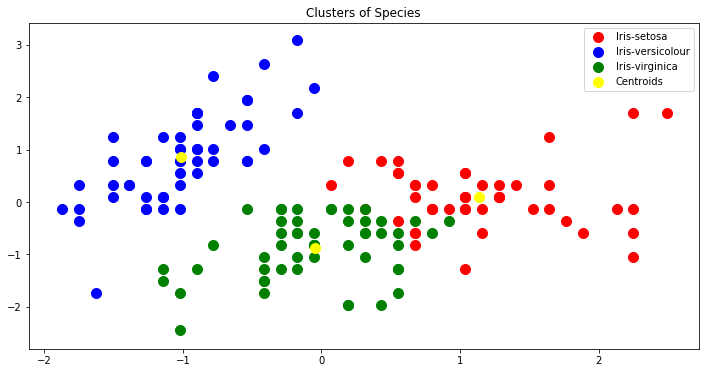

In [10]:
plt.figure(figsize=(12,6))

# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.legend()
plt.show

### INFERENCE
- Optimum value of number of clusters is k=3.